In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# Defina o diretório atual
actual_directory = os.getcwd()  # Use getcwd() para pegar o diretório atual

# Caminhos para os arquivos CSV
fornPath = os.path.join(actual_directory, "..", "data", "Fornecedores.csv")
vendasPath = os.path.join(actual_directory, "..", "data", "VendasGlobais.csv")
transPath = os.path.join(actual_directory, "..", "data", "Transportadoras.csv")
vendedorPath = os.path.join(actual_directory, "..", "data", "Vendedores.csv")

# Ler os arquivos CSV
fornDF = pd.read_csv(fornPath)
vendasDF = pd.read_csv(vendasPath)
transDF = pd.read_csv(transPath)
vendedorDF = pd.read_csv(vendedorPath)

# Mostrar os DataFrames
print(fornDF)
print(vendasDF)
print(transDF)
print(vendedorDF)


    FornecedorID     FornecedorNome
0              1          USA Jeans
1              2      Global Outlet
2              3           Netshoes
3              4         All Sports
4              5   Tuxedo Beachwear
5              6          Surf Trip
6              7       Tennis Place
7              8         Sports Now
8              9        DSW Imports
9             10    Brazilian Style
10            11       Tinas Sports
11            12        Luis Vilton
12            13         Baby Place
13            14      Rossi Clothes
14            15           Fast Way
15            16        L.A. Sports
16            17      Roland Sports
17            18         Baby Dress
18            19     Donald Clothes
19            20     Wills Surfwear
20            21     Danske Treshoe
21            22  Lundenhagen Boots
22            23      Pälsii Sports
23            24     Great Outdoors
24            25      Patamonia Inc
25            26          All Shoes
26            27        Dolc

### 1. Quem são os meus 10 maiores clientes, em termos de vendas ($)?


ClienteNome
Grunewald           201320.4531
Th Fashing          152114.7892
Boleros             131133.1451
Champes              91362.1350
The Corner Store     82519.8235
Eintrach GS          75153.5245
Don Balón            68265.6625
Warp AG              65815.9770
Rode & Vite          59976.9277
Boombastic           50922.4655
Name: Vendas, dtype: float64


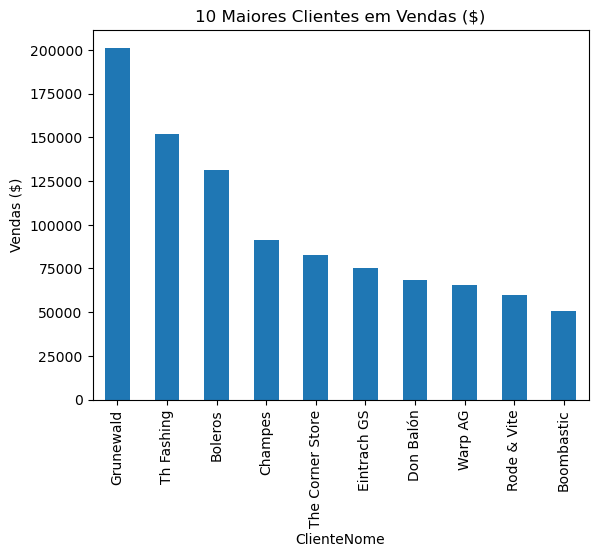

In [5]:
maiores = vendasDF.groupby('ClienteNome')['Vendas'].sum().nlargest(10)
print(maiores)

# Gráfico
maiores.plot(kind='bar', title='10 Maiores Clientes em Vendas ($)')
plt.ylabel('Vendas ($)')
plt.show()

### 2. Quais os três maiores países, em termos de vendas ($)?


ClientePaís
Germany    519553.7336
USA        186313.2205
France     175565.3015
Name: Vendas, dtype: float64


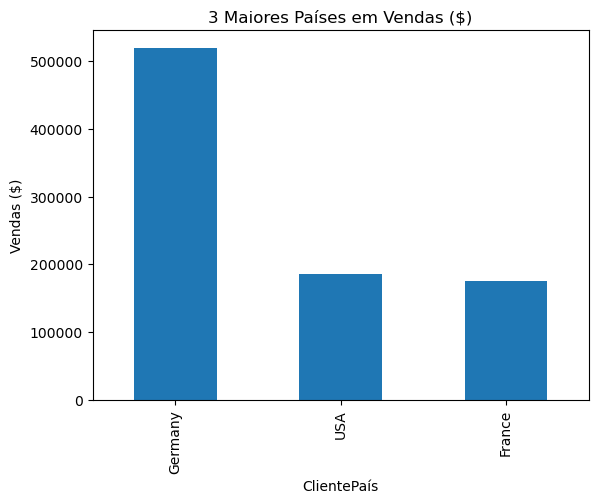

In [6]:
maiores = vendasDF.groupby('ClientePaís')['Vendas'].sum().nlargest(3)
print(maiores)

# Gráfico
maiores.plot(kind='bar', title='3 Maiores Países em Vendas ($)')
plt.ylabel('Vendas ($)')
plt.show()

### 3. Quais as categorias de produtos que geram maior faturamento (vendas $) no Brasil?


CategoriaNome
Womens wear        60941.7265
Sportwear          19509.4255
Babywear           10367.2100
Men´s Footwear      9467.7425
Ladies´Footwear     7798.5190
Men´s Clothes       6158.0640
Bath Clothes        3407.7050
Children´s wear     2752.4250
Name: Vendas, dtype: float64


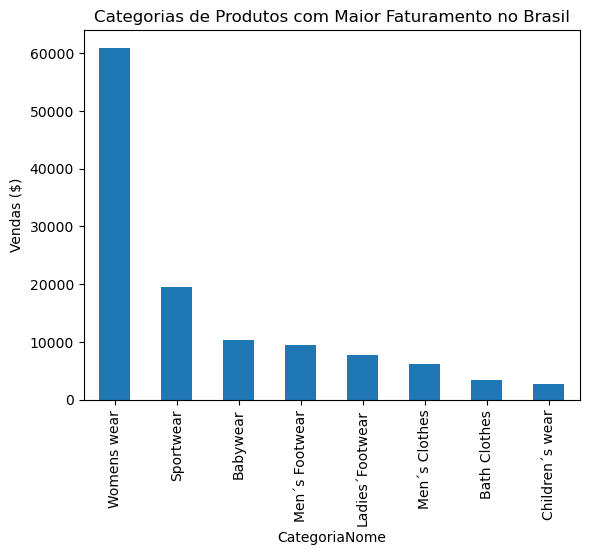

In [8]:
categorias = vendasDF[vendasDF['ClientePaís'] == 'Brazil'].groupby('CategoriaNome')['Vendas'].sum().nlargest(10)
print(categorias)

# Gráfico
categorias.plot(kind='bar', title='Categorias de Produtos com Maior Faturamento no Brasil')
plt.ylabel('Vendas ($)')
plt.show()

## 4. Qual a despesa com frete envolvendo cada transportadora?



  TransportadoraNome  TotalFrete
0   General Shipping    19843.83
1     Global Express    70897.82
2    Great Logistics    18771.69


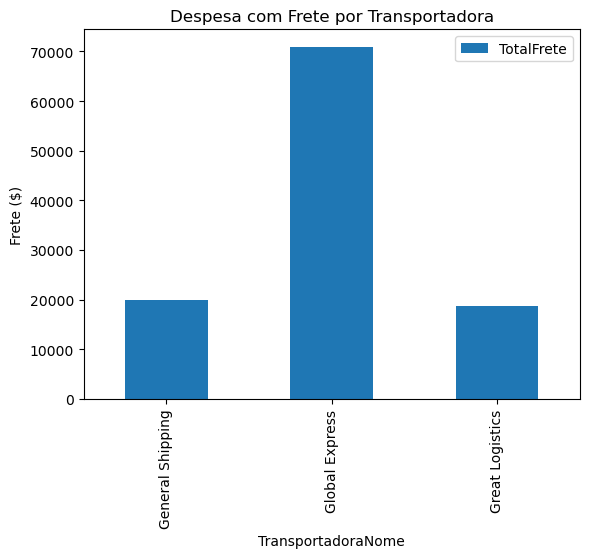

In [11]:
# Calcular a despesa com frete para cada transportadora
frete = vendasDF.groupby('TransportadoraID')['Frete'].sum().reset_index()
frete.rename(columns={'Frete': 'TotalFrete'}, inplace=True)

# Unir os dados de frete com o DataFrame de transportadoras
frete = frete.merge(transDF, left_on='TransportadoraID', right_on='TransportadoraID')
print(frete[['TransportadoraNome', 'TotalFrete']])

# Gráfico
frete.plot(x='TransportadoraNome', y='TotalFrete', kind='bar', title='Despesa com Frete por Transportadora')
plt.ylabel('Frete ($)')
plt.show()


## 5 -  Quais são os principais clientes (vendas $) do segmento “Calçados Masculinos”
(Men ́s Footwear) na Alemanha?

ClienteNome
Grunewald             20488.4850
Gluderstedt           11923.3485
Boombastic            11235.9700
Eintrach GS           10377.8330
Warp AG                9085.7650
Noch Einmal GMBH       3030.7200
Casual Clothing        2602.5025
Halle Köln             1692.5580
Man Kleider            1108.0000
Kohl Industries AG      286.5600
Name: Vendas, dtype: float64


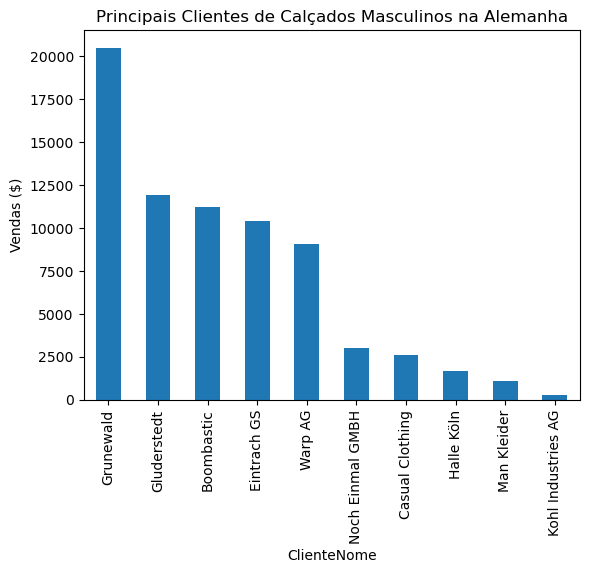

In [13]:
clientes_calçados = vendasDF[(vendasDF['CategoriaNome'] == "Men´s Footwear") & (vendasDF['ClientePaís'] == 'Germany')]
principais = clientes_calçados.groupby('ClienteNome')['Vendas'].sum().nlargest(10)
print(principais)

# Gráfico
principais.plot(kind='bar', title='Principais Clientes de Calçados Masculinos na Alemanha')
plt.ylabel('Vendas ($)')
plt.show()